In [15]:
#Brendan Bain
#Talia Wilk
#Ameena Malik
#Code for Final Report CS4442

#Script for converting dataset from youtube comments to instagram
import csv
import re

#Switch “subscribe to” → “follow”
#Switch “subscribe” → “follow”
#Switch “channel” → “account”
#Switch “Youtube” → “Instagram”
#Switch “Subscribers” → “followers”
#Switch “subscribes to” → “follows”
#Switch “subscribed to” → “followed”
#Switch “Video” → “post”

#read in the datasets one by one from csv files:
#Youtube01-Psy.csv, Youtube02-KatyPerry.csv, Youtube03-LMFAO.csv
#Youtube04-Eminem.csv, Youtube05-Shakira.csv

with open('Youtube05-Shakira.csv', 'r', encoding='utf-8-sig') as file:
    reader = csv.reader(file)
    data = list(reader)

#go through the content column and replace the words
for i in range(1, len(data)):
    #replace subscribe to with follow
    data[i][3] = re.sub('subscribe to', 'follow', data[i][3], flags=re.IGNORECASE)
    #replace subscribe with follow
    data[i][3] = re.sub('subscribe', 'follow', data[i][3], flags=re.IGNORECASE)
    #replace channel with account
    data[i][3] = re.sub('channel', 'account', data[i][3], flags=re.IGNORECASE)
    #replace Youtube with Instagram
    data[i][3] = re.sub('Youtube', 'Instagram', data[i][3], flags=re.IGNORECASE)
    #replace Subscribers with followers
    data[i][3] = re.sub('Subscribers', 'followers', data[i][3], flags=re.IGNORECASE)
    #replace subscribes to with follows
    data[i][3] = re.sub('subscribes to', 'follows', data[i][3], flags=re.IGNORECASE)
    #replace subscribed to with followed
    data[i][3] = re.sub('subscribed to', 'followed', data[i][3], flags=re.IGNORECASE)
    #replace Video with post
    data[i][3] = re.sub('Video', 'post', data[i][3], flags=re.IGNORECASE)

#write the new dataset to a new csv file
with open('Instagram05-Shakira.csv', 'w', newline='', encoding='utf-8-sig') as file:
    writer = csv.writer(file, lineterminator='\n')
    writer.writerows(data)


#combine all Instagram csv into one
with open('Instagram01-Psy.csv', 'r', encoding='utf-8-sig') as file:
    reader = csv.reader(file)
    data = list(reader)

with open('Instagram02-KatyPerry.csv', 'r', encoding='utf-8-sig') as file:
    reader = csv.reader(file)
    next(reader)  # skip the header
    data += list(reader)

with open('Instagram03-LMFAO.csv', 'r', encoding='utf-8-sig') as file:
    reader = csv.reader(file)
    next(reader)  # skip the header
    data += list(reader)

with open('Instagram04-Eminem.csv', 'r', encoding='utf-8-sig') as file:
    reader = csv.reader(file)
    next(reader)  # skip the header
    data += list(reader)

with open('Instagram05-Shakira.csv', 'r', encoding='utf-8-sig') as file:
    reader = csv.reader(file)
    next(reader)  # skip the header
    data += list(reader)

#write the new dataset to a new csv file
with open('InstagramAll.csv', 'w', newline='', encoding='utf-8-sig') as file:
    writer = csv.writer(file, lineterminator='\n')
    writer.writerows(data)


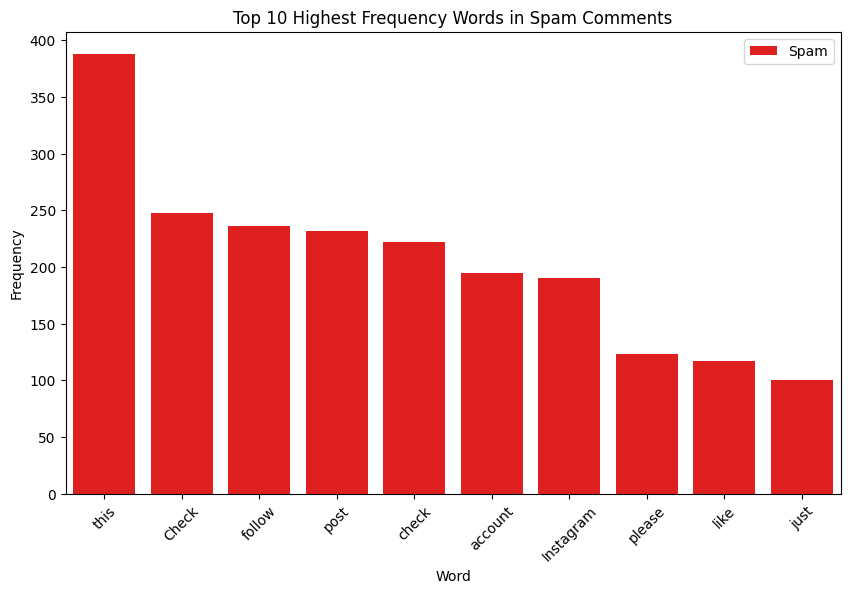

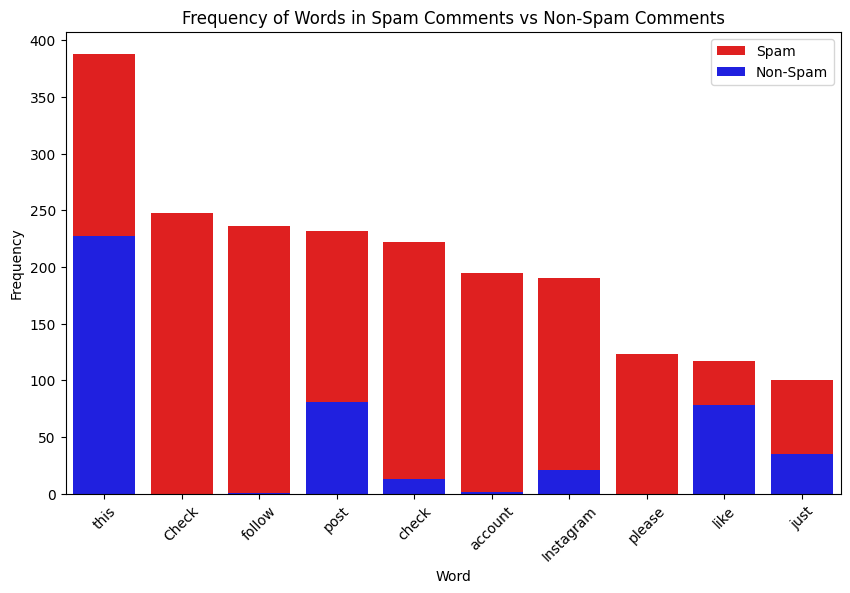

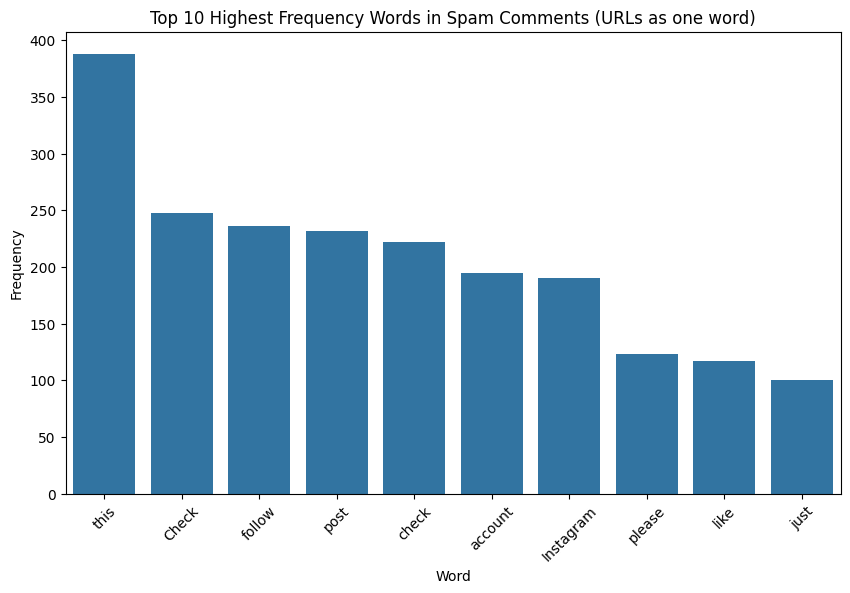

In [37]:
#Creating highest frequency word list of spam comments
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import re

#read in the dataset InstagramAll.csv
with open('InstagramAll.csv', 'r', encoding='utf-8-sig') as file:
    reader = csv.reader(file)
    data = list(reader)

#go through the content column of all class=1 and get the highest frequency words of spam comments
spam = []
for i in range(1, len(data)):
    if data[i][4] == '1':
        spam.append(data[i][3])

#combine all spam comments into one string and preprocess
spam = ' '.join(spam)
spam = re.sub(r'[^\w\s]', '', spam)
spam = re.sub(r'\d+', '', spam)
spam = re.sub(r'\s+', ' ', spam)
spam = spam.split()

#count the frequency of each word creater than 3 characters
word_freq1 = Counter(spam)
word_freq1 = {k: v for k, v in word_freq1.items() if len(k) > 3}

#sort the dictionary by value
word_freq1 = dict(sorted(word_freq1.items(), key=lambda item: item[1], reverse=True))

#plot the top 10 highest frequency words
plt.figure(figsize=(10, 6))
sns.barplot(x=list(word_freq1.keys())[:10], y=list(word_freq1.values())[:10], color='red', label='Spam')
plt.title('Top 10 Highest Frequency Words in Spam Comments')
plt.ylabel('Frequency')
plt.xlabel('Word')
plt.xticks(rotation=45)
plt.show()

#count the frequency of these words in nonspam comments
spamwords = ["this", "Check", "follow", "post", "check", "account", "Instagram", "please", "like", "just"]
nonspam = []
for i in range(1, len(data)):
    if data[i][4] == '0':
        nonspam.append(data[i][3])

##combine all nonspam comments into one string and preprocess 
nonspam = ' '.join(nonspam)
nonspam = re.sub(r'[^\w\s]', '', nonspam)
nonspam = re.sub(r'\d+', '', nonspam)
nonspam = re.sub(r'\s+', ' ', nonspam)
nonspam = nonspam.split()

#count the frequency of each word in spamwords, include words with frequency 0
word_freq = Counter(nonspam)
word_freq = {k: v for k, v in word_freq.items() if k in spamwords}

#add in words with frequency 0
for word in spamwords:
    if word not in word_freq:
        word_freq[word] = 0

#plot the frequency of these words in nonspam comments against spam comments with the bars next to each other
plt.figure(figsize=(10, 6))
sns.barplot(x=list(word_freq1.keys())[:10], y=list(word_freq1.values())[:10], color='red', label='Spam')
sns.barplot(x=list(word_freq.keys()), y=list(word_freq.values()), color='blue', label='Non-Spam')
plt.title('Frequency of Words in Spam Comments vs Non-Spam Comments')
plt.ylabel('Frequency')
plt.xlabel('Word')
plt.xticks(rotation=45)
plt.legend()
plt.show()

#count the frequency of words in spam comments considering any word starting with ‘https’, ‘http’ or ‘www’ as the same word
#read in the dataset InstagramAll.csv
with open('InstagramAll.csv', 'r', encoding='utf-8-sig') as file:
    reader = csv.reader(file)
    data = list(reader)

#go through the content column of all class=1 and convert any word starting with ‘https’, ‘http’ or ‘www’ to 'URL'
spam = []
for i in range(1, len(data)):
    if data[i][4] == '1':
        spam.append(data[i][3])

spam = ' '.join(spam)
spam = re.sub(r'[^\w\s]', '', spam)
spam = re.sub(r'\d+', '', spam)
spam = re.sub(r'\s+', ' ', spam)
spam = spam.split()

#convert any word starting with ‘https’, ‘http’ or ‘www’ to 'URL'
spam = ['URL' if re.match(r'^https?:\/\/.*[\r\n]*', word) or re.match(r'^www\..*[\r\n]*', word) else word for word in spam]

#count the frequency of URL 
word_freq = Counter(spam)
word_freq = {k: v for k, v in word_freq.items() if len(k) > 3}

#sort the dictionary by value
word_freq = dict(sorted(word_freq.items(), key=lambda item: item[1], reverse=True))

#plot the top 10 highest frequency words
plt.figure(figsize=(10, 6))
sns.barplot(x=list(word_freq.keys())[:10], y=list(word_freq.values())[:10])
plt.title('Top 10 Highest Frequency Words in Spam Comments (URLs as one word)')
plt.ylabel('Frequency')
plt.xlabel('Word')
plt.xticks(rotation=45)
plt.show()




In [1]:
#ITERATION 1
import csv
import pandas as pd
import torch
from transformers import AlbertTokenizer, AlbertForSequenceClassification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from torch.utils.data import DataLoader, Dataset

#Class extending Dataset to handle spam comment initializations
class SpamDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# Read in the dataset
with open('InstagramAll.csv', 'r', encoding='utf-8-sig') as file:
    reader = csv.reader(file)
    data = list(reader)

# Convert data to DataFrame for easier handling
df = pd.DataFrame(data[1:], columns=data[0])
df = df.sample(frac=1).reset_index(drop=True)
comments = df.iloc[:, 3].tolist()
labels = df.iloc[:, 4].astype(int).tolist()

# Split dataset into train and test sets
train_comments, test_comments, train_labels, test_labels = train_test_split(comments, labels, test_size=0.2, random_state=42)

# Load ALBERT tokenizer and model
tokenizer = AlbertTokenizer.from_pretrained('albert-base-v2')
model = AlbertForSequenceClassification.from_pretrained('albert-base-v2', num_labels=2)

# Tokenize comments and convert them to tensors
train_encodings = tokenizer(train_comments, truncation=True, padding=True)
test_encodings = tokenizer(test_comments, truncation=True, padding=True)

# Create datasets and data loaders
train_dataset = SpamDataset(train_encodings, train_labels)
test_dataset = SpamDataset(test_encodings, test_labels)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

# Fine-tune ALBERT on the spam detection task
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)

for epoch in range(3):  # Adjust number of epochs as needed
    model.train()
    for batch in train_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        
        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

# Evaluate the fine-tuned model
model.eval()
predictions = []
true_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1)
        
        predictions.extend(preds.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

accuracy = accuracy_score(true_labels, predictions)
print("Accuracy:", accuracy)


C:\Users\Brendan\AppData\Local\Temp\ipykernel_14992\320788472.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
c:\Users\Brendan\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\Brendan\AppData\Local\Programs\Python\Python310\lib\site-packages\huggingface_hub\file_download.py:148: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicat

KeyboardInterrupt: 

In [1]:
#ITERATION 2
import csv
import pandas as pd
import torch
from transformers import AlbertTokenizer, AlbertForSequenceClassification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from torch.utils.data import DataLoader, Dataset
from tqdm import tqdm

#Class extending Dataset to handle spam comment initializations
class SpamDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)


# Read in the dataset
with open('InstagramAll.csv', 'r', encoding='utf-8-sig') as file:
    reader = csv.reader(file)
    data = list(reader)

# Convert data to DataFrame for easier handling
df = pd.DataFrame(data[1:], columns=data[0])
df = df.sample(frac=1).reset_index(drop=True)
comments = df.iloc[:, 3].tolist()
labels = df.iloc[:, 4].astype(int).tolist()

# Split dataset into train and test sets
train_comments, test_comments, train_labels, test_labels = train_test_split(comments, labels, test_size=0.2, random_state=42)

# Load ALBERT tokenizer and model
tokenizer = AlbertTokenizer.from_pretrained('albert-base-v2')
model = AlbertForSequenceClassification.from_pretrained('albert-base-v2', num_labels=2)

print(torch.cuda.is_available()) #Use GPU debug
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Tokenize comments and convert them to tensors
train_encodings = tokenizer(train_comments, truncation=True, padding=True)
train_dataset = SpamDataset(train_encodings, train_labels)
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)

test_encodings = tokenizer(test_comments, truncation=True, padding=True)
test_dataset = SpamDataset(test_encodings, test_labels)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)

# Training loop with progress bar
epochs = 1
for epoch in range(epochs):
    model.train()
    total_loss = 0
    with tqdm(train_loader, desc=f'Epoch {epoch + 1}/{epochs}', unit='batch') as t:
        for batch in t:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)
            
            optimizer.zero_grad()
            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            loss.backward()
            optimizer.step()
            
            total_loss += loss.item()
            t.set_postfix_str(loss=total_loss / len(train_loader))

# Evaluate the fine-tuned model
model.eval()
predictions = []
true_labels = []

with torch.no_grad():
    for batch in tqdm(test_loader, desc='Evaluation', unit='batch'):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1)
        
        predictions.extend(preds.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

accuracy = accuracy_score(true_labels, predictions)
print("Accuracy:", accuracy)


C:\Users\Brendan\AppData\Local\Temp\ipykernel_23048\603348977.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
c:\Users\Brendan\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this

True


Evaluation: 100%|██████████| 49/49 [00:44<00:00,  1.11batch/s]

Accuracy: 0.4923469387755102


In [10]:
#ITERATION 3.0 MANUAL KFOLD with explicit fold sizes
import csv
import pandas as pd
import torch
import numpy as np
from transformers import AlbertTokenizer, AlbertForSequenceClassification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from torch.utils.data import DataLoader, Dataset
from tqdm import tqdm

#Class extending Dataset to handle spam comment initializations
class SpamDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)


# Read in the dataset
with open('InstagramAll.csv', 'r', encoding='utf-8-sig') as file:
    reader = csv.reader(file)
    data = list(reader)

df = pd.DataFrame(data[1:], columns=data[0]) # Convert data to DataFrame for easier handling
df = df.sample(frac=1).reset_index(drop=True) # Shuffle the data

# Option to use a smaller subset of data to test faster
use_subset = False
subset_frac = 0.1  #10% of the data
if use_subset:
    df = df.sample(frac=subset_frac).reset_index(drop=True)

original_df = df.copy() #copy of the original dataframe for resetting
num_folds = 5 #KFold cross-validation parameters
total_size = len(df)

# Initialize lists for metrics
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Load ALBERT tokenizer and model
tokenizer = AlbertTokenizer.from_pretrained('albert-base-v2')
model = AlbertForSequenceClassification.from_pretrained('albert-base-v2', num_labels=2)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') #Use GPU
model.to(device)

indices = np.arange(total_size)
np.random.shuffle(indices)
samples_per_fold = total_size // num_folds

for fold in range(num_folds):
    print(f'Fold {fold + 1}')

    df = original_df.copy() #Reset comments and labels at start of each fold
    comments = df.iloc[:, 3].tolist()
    labels = df.iloc[:, 4].astype(int).tolist()

    # Calculate start and end indices for the test set
    start, end = fold * samples_per_fold, (fold + 1) * samples_per_fold
    if fold == num_folds - 1:
        end = total_size
    
    # Extract test and train indices
    test_indices = indices[start:end]
    train_indices = np.delete(indices, np.arange(start, end))

    # Tokenize and prepare DataLoader instances here for train and test sets
    train_comments = [comments[i] for i in train_indices]
    train_labels = [labels[i] for i in train_indices]
    train_encodings = tokenizer(train_comments, truncation=True, padding=True)
    train_dataset = SpamDataset(train_encodings, train_labels)
    train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True, drop_last=True)
    
    test_comments = [comments[i] for i in test_indices]
    test_labels = [labels[i] for i in test_indices]
    test_encodings = tokenizer(test_comments, truncation=True, padding=True)
    test_dataset = SpamDataset(test_encodings, test_labels)
    test_loader = DataLoader(test_dataset, batch_size=4, shuffle=False, drop_last=True)

    #TRAINING
    optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)
    for epoch in range(1):  # Assume you're doing one epoch per fold for simplicity
        model.train()
        total_loss = 0
        for batch in tqdm(train_loader, desc=f'Fold {fold + 1}, Epoch {epoch + 1}', unit='batch'):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            optimizer.zero_grad()
            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

    #TESTING
    model.eval()
    predictions = []
    true_labels = []
    with torch.no_grad():
        for batch in test_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            preds = torch.argmax(logits, dim=1)

            predictions.extend(preds.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())

    # Calculate metrics
    accuracy = accuracy_score(true_labels, predictions)
    precision = precision_score(true_labels, predictions, zero_division=0)
    recall = recall_score(true_labels, predictions, zero_division=0)
    f1 = f1_score(true_labels, predictions, zero_division=0)

    #organize and print metrics
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

    print(f'Fold {fold + 1} Metrics:')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1-score: {f1:.4f}')

# Calculate average metrics
avg_accuracy = sum(accuracies) / len(accuracies)
avg_precision = sum(precisions) / len(precisions)
avg_recall = sum(recalls) / len(recalls)
avg_f1 = sum(f1_scores) / len(f1_scores)

print('Average Metrics:')
print(f'Accuracy: {np.mean(accuracies):.4f}')
print(f'Precision: {np.mean(precisions):.4f}')
print(f'Recall: {np.mean(recalls):.4f}')
print(f'F1-score: {np.mean(f1_scores):.4f}')

#------------------------------------------------------------
#evaluate the trained model on the whole test set RealInstagram.csv
with open('RealInstagram.csv', 'r', encoding='utf-8-sig') as file:
    reader = csv.reader(file)
    data = list(reader)

df = pd.DataFrame(data[1:], columns=data[0])
comments = df.iloc[:, 3].tolist()
labels = df.iloc[:, 4].astype(int).tolist()

encodings = tokenizer(comments, truncation=True, padding=True)
dataset = SpamDataset(encodings, labels)
loader = DataLoader(dataset, batch_size=4, shuffle=False, drop_last=True)

model.eval()
predictions = []
true_labels = []
with torch.no_grad():
    for batch in loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1)

        predictions.extend(preds.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

# Calculate metrics
accuracy = accuracy_score(true_labels, predictions)
precision = precision_score(true_labels, predictions, zero_division=0)
recall = recall_score(true_labels, predictions, zero_division=0)
f1 = f1_score(true_labels, predictions, zero_division=0)

print("RealInstagram Test Set Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Writing predictions to a CSV file for comparison
csv_filename = "model_predictions.csv"
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["True Label", "Prediction"])
    for true_label, prediction in zip(true_labels, predictions):
        writer.writerow([true_label, prediction]) 
print(f"Predictions and true labels written to {csv_filename}")

Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Fold 1


Fold 1, Epoch 1: 100%|██████████| 391/391 [06:45<00:00,  1.04s/batch]


Fold 1 Metrics:
Accuracy: 0.9381
Precision: 0.9581
Recall: 0.9196
F1-score: 0.9385
Fold 2


Fold 2, Epoch 1: 100%|██████████| 391/391 [06:48<00:00,  1.04s/batch]


Fold 2 Metrics:
Accuracy: 0.9536
Precision: 0.9679
Recall: 0.9378
F1-score: 0.9526
Fold 3


Fold 3, Epoch 1: 100%|██████████| 391/391 [06:49<00:00,  1.05s/batch]


Fold 3 Metrics:
Accuracy: 0.9613
Precision: 0.9784
Recall: 0.9427
F1-score: 0.9602
Fold 4


Fold 4, Epoch 1: 100%|██████████| 391/391 [03:51<00:00,  1.69batch/s]


Fold 4 Metrics:
Accuracy: 0.9691
Precision: 1.0000
Recall: 0.9426
F1-score: 0.9704
Fold 5


Fold 5, Epoch 1: 100%|██████████| 391/391 [06:49<00:00,  1.05s/batch]


Fold 5 Metrics:
Accuracy: 0.8138
Precision: 0.7668
Recall: 0.9327
F1-score: 0.8416
Average Metrics:
Accuracy: 0.9272
Precision: 0.9342
Recall: 0.9351
F1-score: 0.9327
RealInstagram Test Set Metrics:
Accuracy: 0.65
Precision: 0.6578947368421053
Recall: 0.5319148936170213
F1-score: 0.5882352941176471
Predictions and true labels written to model_predictions.csv


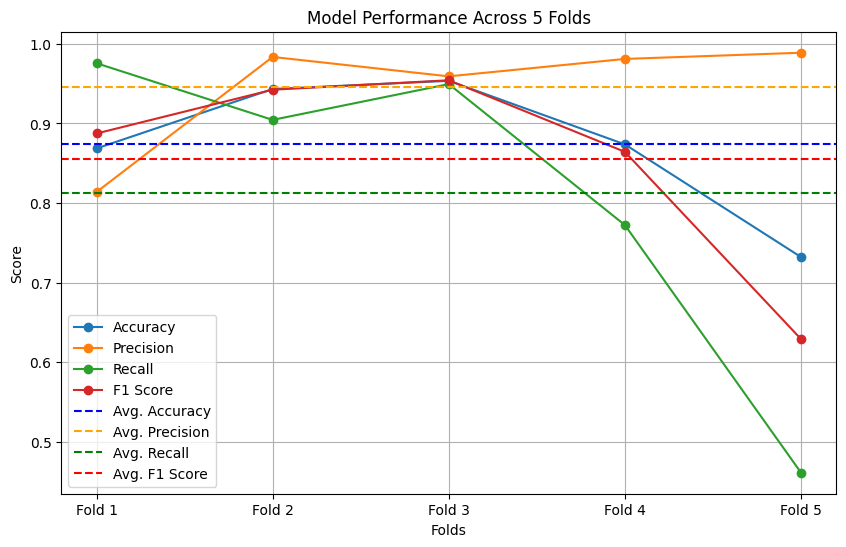

In [38]:
#Plot Metrics across folds

# Example metrics from 5 folds
folds = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5']
accuracy = [0.8686, 0.9433, 0.9536, 0.8737, 0.7321]
precision = [0.8138, 0.9836, 0.9592, 0.9811, 0.9889]
recall = [0.9757, 0.9045, 0.9495, 0.7723, 0.4611]
f1_score = [0.8874, 0.9424, 0.9543, 0.8643, 0.6290]

# Calculate averages
avg_accuracy = 0.8743
avg_precision = 0.9453
avg_recall = 0.8126
avg_f1_score = 0.8555

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(folds, accuracy, label='Accuracy', marker='o')
plt.plot(folds, precision, label='Precision', marker='o')
plt.plot(folds, recall, label='Recall', marker='o')
plt.plot(folds, f1_score, label='F1 Score', marker='o')

# Plot averages as horizontal lines
plt.axhline(avg_accuracy, color='blue', linestyle='--', label='Avg. Accuracy')
plt.axhline(avg_precision, color='orange', linestyle='--', label='Avg. Precision')
plt.axhline(avg_recall, color='green', linestyle='--', label='Avg. Recall')
plt.axhline(avg_f1_score, color='red', linestyle='--', label='Avg. F1 Score')

plt.title('Model Performance Across 5 Folds')
plt.xlabel('Folds')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()
